<a href="https://colab.research.google.com/github/CSI-Project444/CSI/blob/main/KNN_By_lang_ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5_K-Nearest Neighbors (KNN)**

Import Library

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Import File or File Path

In [39]:
url='https://raw.githubusercontent.com/CSI-Project444/CSI/main/Data/final02.csv'
df=pd.read_csv(url)
df

,Zone,mag1,mag2,mag3,mag4,mag5,mag6,mag7,mag8,mag9,...,mag43,mag44,mag45,mag46,mag47,mag48,mag49,mag50,mag51,mag52
0,1,11.401754,12.369317,11.704700,12.649111,12.369317,12.369317,12.649111,12.649111,12.649111,...,10.295630,10.295630,10.295630,9.848858,9.848858,9.848858,9.486833,9.486833,10.198039,9.055385
1,1,11.704700,12.083046,12.083046,12.083046,12.083046,12.083046,12.083046,12.083046,12.083046,...,9.433981,9.433981,8.944272,8.944272,8.544004,8.544004,8.544004,9.219544,9.219544,8.062258
2,1,13.038405,12.206556,13.038405,13.038405,13.038405,13.038405,13.038405,12.206556,13.038405,...,9.219544,8.602325,8.602325,8.602325,8.062258,8.062258,8.062258,7.615773,8.544004,7.280110
3,1,13.892444,13.416408,13.416408,13.416408,13.416408,12.529964,13.416408,12.529964,12.529964,...,8.944272,7.615773,8.062258,8.062258,8.602325,8.602325,7.810250,7.810250,7.810250,7.071068
4,1,13.000000,13.000000,12.083046,13.000000,13.000000,12.083046,12.083046,12.083046,12.083046,...,7.211103,7.211103,7.615773,7.615773,7.615773,7.280110,7.280110,7.280110,7.071068,7.071068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,4,8.944272,9.486833,8.544004,9.486833,8.246211,9.219544,9.055385,9.055385,9.055385,...,11.045361,10.049876,10.000000,9.000000,9.000000,9.055385,9.055385,8.062258,8.246211,7.280110
7918,4,10.198039,10.049876,10.000000,10.049876,10.000000,10.000000,10.049876,10.049876,10.049876,...,11.401754,11.401754,10.198039,10.198039,10.049876,9.055385,9.000000,9.000000,9.000000,8.062258
7919,4,9.848858,10.295630,9.433981,9.433981,9.433981,10.000000,9.219544,9.899495,9.899495,...,10.630146,10.630146,9.899495,9.899495,9.219544,9.219544,8.602325,8.602325,8.062258,8.062258
7920,4,9.486833,9.848858,9.848858,9.848858,10.295630,9.433981,10.000000,10.000000,10.000000,...,10.630146,10.000000,10.000000,9.433981,9.433981,9.433981,8.944272,8.062258,7.615773,7.615773


แบ่งชุดข้อมูลเป็นข้อมูล test และข้อมูล train

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization
test_size=0.6
X_train, X_test, y_train, y_test = train_test_split(
    df[['mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'mag8',
       'mag9', 'mag10', 'mag11', 'mag14', 'mag15', 'mag16',
       'mag17', 'mag18', 'mag19', 'mag20', 'mag21', 'mag22', 'mag23', 'mag24',
       'mag25', 'mag26', 'mag27', 'mag28', 'mag29', 'mag30', 'mag31', 'mag32',
       'mag33', 'mag34', 'mag35', 'mag36', 'mag37', 'mag38', 'mag39', 'mag40',
       'mag41', 'mag42', 'mag43', 'mag44', 'mag45', 'mag46', 'mag47', 'mag48',
       'mag49', 'mag50', 'mag51', 'mag52']], 
    df.Zone, 
    test_size=test_size, random_state=7)

สร้างแบบจำลอง K-Nearest Neighbours

In [49]:
prefer_k = 12
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [50]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.72397476, 0.75709779, 0.7318612 , 0.71879937, 0.74407583])

ดูค่า Accuracy

In [51]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.735 (0.014)


**วิธีเลือกค่า K**

ทุกตัว

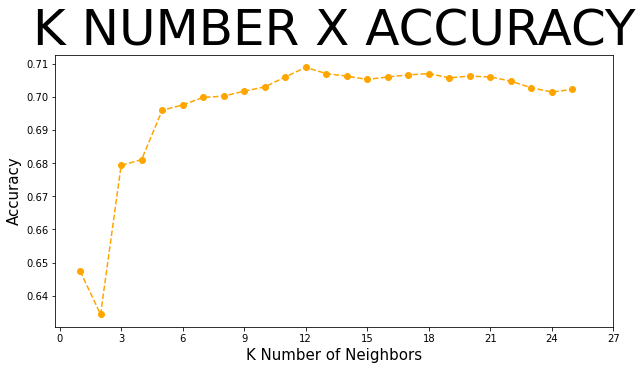

The best value of k = {'n_neighbors': 12} with 0.7090284548959629 of accuracy.


In [52]:
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')
grid.fit(df[[ 'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'mag8',
       'mag9', 'mag10', 'mag11', 'mag12', 'mag13', 'mag14', 'mag15', 'mag16',
       'mag17', 'mag18', 'mag19', 'mag20', 'mag21', 'mag22', 'mag23', 'mag24',
       'mag25', 'mag26', 'mag27', 'mag28', 'mag29', 'mag30', 'mag31', 'mag32',
       'mag33', 'mag34', 'mag35', 'mag36', 'mag37', 'mag38', 'mag39', 'mag40',
       'mag41', 'mag42', 'mag43', 'mag44', 'mag45', 'mag46', 'mag47', 'mag48',
       'mag49', 'mag50', 'mag51', 'mag52']], df.Zone)
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 50})
plt.xticks(range(0,30,3),)
plt.show()
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

เลือกบางตัว

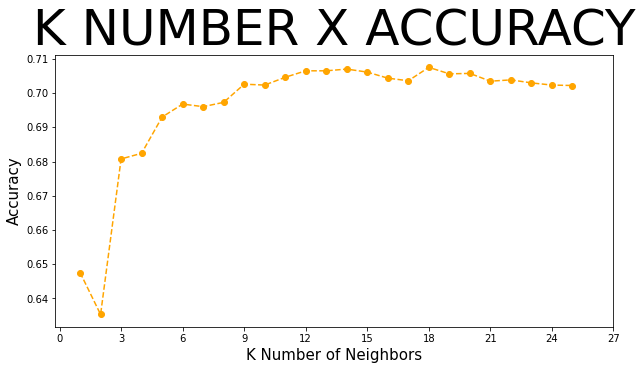

The best value of k = {'n_neighbors': 18} with 0.7075132237198484 of accuracy.


In [33]:
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')
grid.fit(df[[ 'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'mag8',
       'mag9', 'mag10', 'mag11', 'mag14', 'mag15', 'mag16',
       'mag17', 'mag18', 'mag19', 'mag20', 'mag21', 'mag22', 'mag23', 'mag24',
       'mag25', 'mag26', 'mag27', 'mag28', 'mag29', 'mag30', 'mag31', 'mag32',
       'mag33', 'mag34', 'mag35', 'mag36', 'mag37', 'mag38', 'mag39', 'mag40',
       'mag41', 'mag42', 'mag43', 'mag44', 'mag45', 'mag46', 'mag47', 'mag48',
       'mag49', 'mag50', 'mag51', 'mag52']], df.Zone)
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 50})
plt.xticks(range(0,30,3),)
plt.show()
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))